##EDA Report: NF-UNSW-NB15-v2

###1. Dataset Overview and Key Findings
The NF-UNSW-NB15-v2 dataset contains 2,390,275 network flow records with 45 features designed for network intrusion detection. The dataset exhibits severe class imbalance, with benign traffic (Label=0) comprising approximately 94% (1,188,517 records) and attack traffic (Label=1) only 6% (73,622 records).

###2. Feature Distribution Characteristics
The numerical features display extreme right-skewed distributions with substantial outliers. Traffic volume features (IN_BYTES, OUT_BYTES, IN_PKTS, OUT_PKTS) are heavily concentrated near zero, with rare extreme values reaching up to 1e7 for bytes and exceeding 10,000 for packets. Flow duration metrics show similar patterns, with most connections being very short-lived but occasional outliers extending to 5e6 milliseconds. The throughput features (SRC_TO_DST_AVG_THROUGHPUT, DST_TO_SRC_AVG_THROUGHPUT) exhibit bimodal distributions, suggesting distinct behavioral patterns between normal and malicious traffic.

###3. Attack Type Analysis
The dataset includes 10 attack categories (Fuzzers, DoS, Exploits, Reconnaissance, Generic, Backdoor, Shellcode, Worms, Analysis), with Generic and Reconnaissance attacks showing the most distinctive traffic patterns. Boxplot analysis reveals that Generic attacks exhibit higher median byte counts and more dispersed distributions, while Reconnaissance attacks demonstrate greater variability in throughput. Notably, flow duration remains consistently low across all attack types, indicating that most attacks occur within brief time windows.

###4. Feature Correlations and Redundancy
The correlation heatmap reveals strong multicollinearity among related feature groups. IN_BYTES and IN_PKTS show correlation coefficients exceeding 0.8, as do OUT_BYTES and OUT_PKTS. Similarly, retransmission-related features (RETRANSMITTED_IN_BYTES, RETRANSMITTED_IN_PKTS) exhibit high correlation. This redundancy suggests that dimensionality reduction or feature selection should be applied during model development to improve computational efficiency and prevent overfitting. Additionally, TCP flag features and window size metrics demonstrate moderate correlations that warrant consideration in feature engineering.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os, sys

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Load the dataset: NF-UNSW-NB15-v2**

In [ ]:
import pandas as pd
file_path = "/content/drive/MyDrive/FlowTransformer/data/NF-UNSW-NB15-v2/NF-UNSW-NB15-v2.csv"
df = pd.read_csv(file_path)
print(df.shape)

(2390275, 45)


**1. Basic Data Preview**

In [ ]:
print(df.shape)
print(df.columns)
print(df.head())

(2390275, 45)
Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS',
       'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS',
       'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 'MIN_TTL',
       'MAX_TTL', 'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN',
       'MAX_IP_PKT_LEN', 'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES',
       'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS',
       'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS',
       'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
       'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT',
       'ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE',
       'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE', 'Label', 'Attack'],
      dtype=

**2. Missing Values Checking**

In [ ]:
print(df.isnull().sum().sort_values(ascending=False))

IPV4_SRC_ADDR                  0
L4_SRC_PORT                    0
IPV4_DST_ADDR                  0
L4_DST_PORT                    0
PROTOCOL                       0
L7_PROTO                       0
IN_BYTES                       0
IN_PKTS                        0
OUT_BYTES                      0
OUT_PKTS                       0
TCP_FLAGS                      0
CLIENT_TCP_FLAGS               0
SERVER_TCP_FLAGS               0
FLOW_DURATION_MILLISECONDS     0
DURATION_IN                    0
DURATION_OUT                   0
MIN_TTL                        0
MAX_TTL                        0
LONGEST_FLOW_PKT               0
SHORTEST_FLOW_PKT              0
MIN_IP_PKT_LEN                 0
MAX_IP_PKT_LEN                 0
SRC_TO_DST_SECOND_BYTES        0
DST_TO_SRC_SECOND_BYTES        0
RETRANSMITTED_IN_BYTES         0
RETRANSMITTED_IN_PKTS          0
RETRANSMITTED_OUT_BYTES        0
RETRANSMITTED_OUT_PKTS         0
SRC_TO_DST_AVG_THROUGHPUT      0
DST_TO_SRC_AVG_THROUGHPUT      0
NUM_PKTS_U

**3. Duplicate Rows Checking**

In [ ]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

0


**4. Outlier and Anomaly Detection**

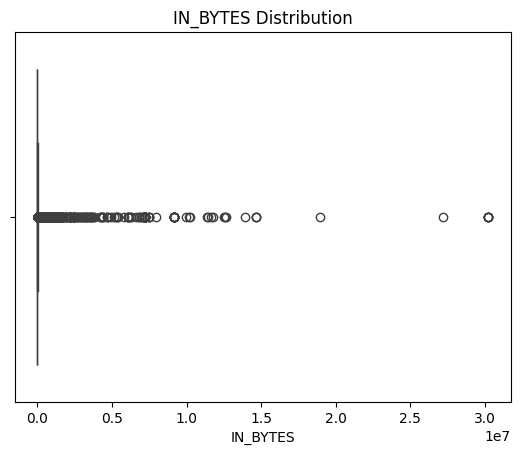

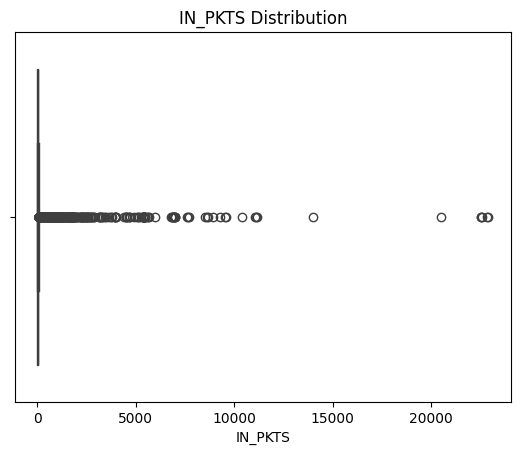

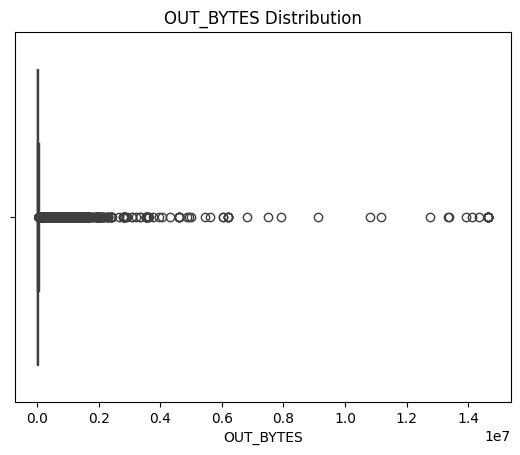

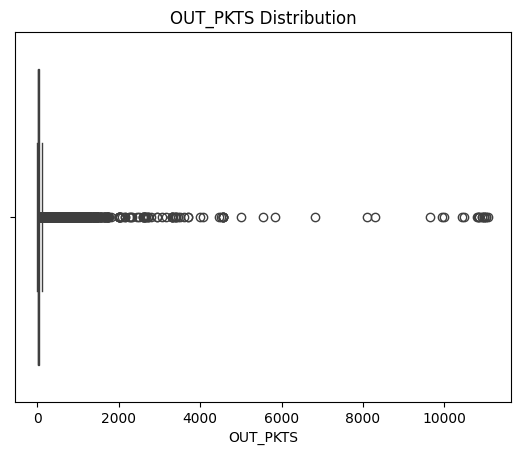

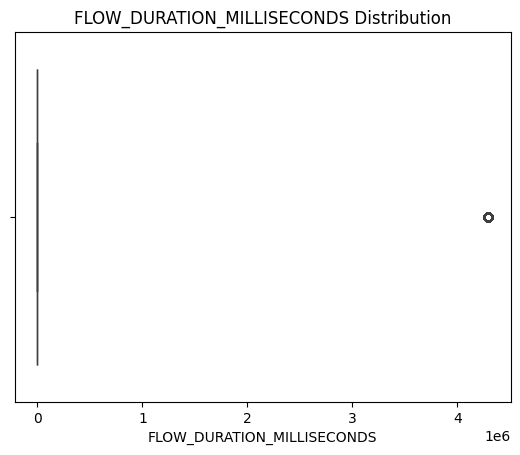

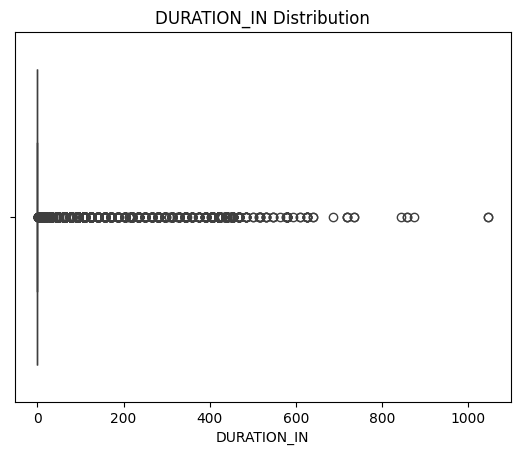

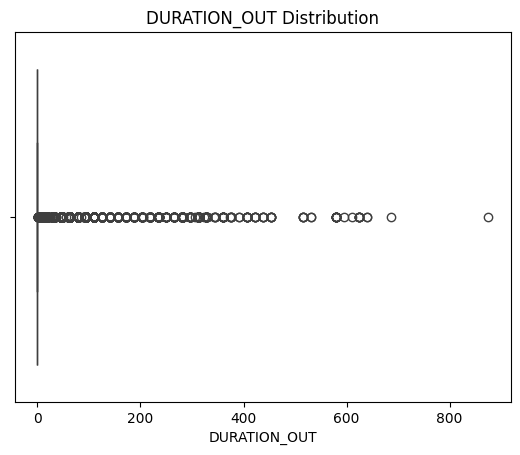

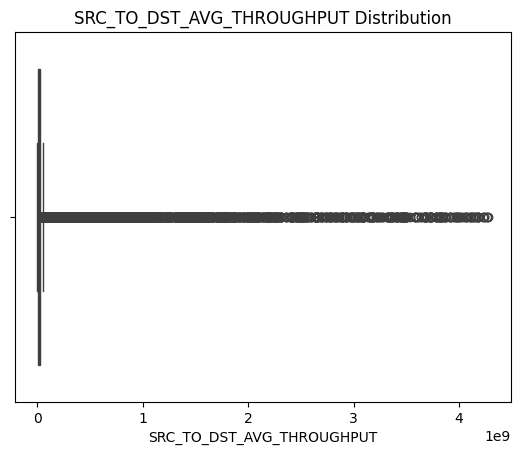

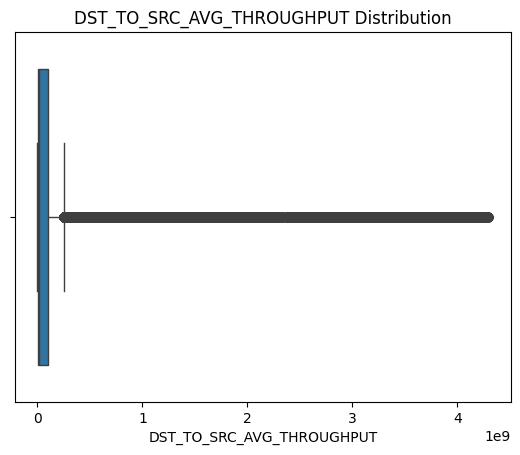

In [ ]:
num_cols = [
    'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS',
    'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT',
    'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT'
]
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'{col} Distribution')
    plt.show()


**5. Data Preprocessing (Deduplication, Imputation, Outlier Removal)**

In [ ]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]

**6. Class Distribution Overview**

Label
0    1188517
1      73622
Name: count, dtype: int64


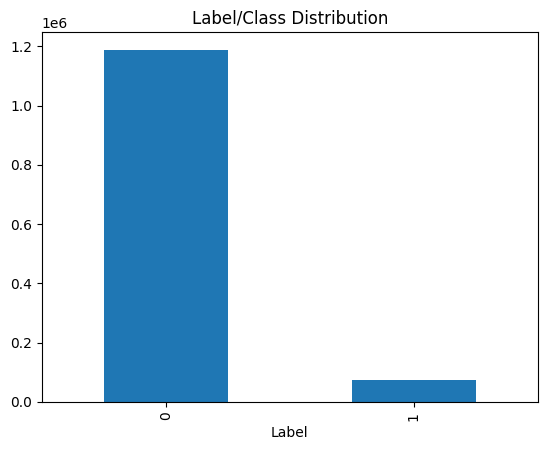

In [ ]:
print(df['Label'].value_counts())
df['Label'].value_counts().plot(kind='bar')
plt.title('Label/Class Distribution')
plt.show()

**7. Sample Records with Class Labels**

In [ ]:
print(df[['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
          'PROTOCOL', 'IN_BYTES', 'OUT_BYTES', 'Label', 'Attack']].head())

  IPV4_SRC_ADDR  L4_SRC_PORT  IPV4_DST_ADDR  L4_DST_PORT  PROTOCOL  IN_BYTES  \
0    59.166.0.5         1305  149.171.126.8           21         6         9   
1    59.166.0.5         1305  149.171.126.8           21         6       261   
2    59.166.0.5         1305  149.171.126.8           21         6       481   
3    59.166.0.5         1305  149.171.126.8           21         6       701   
4    59.166.0.5         1305  149.171.126.8           21         6      1031   

   OUT_BYTES  Label  Attack  
0        193      0  Benign  
1        469      0  Benign  
2        750      0  Benign  
3       1054      0  Benign  
4       1474      0  Benign  


**8. Attack Type Distribution by Feature**

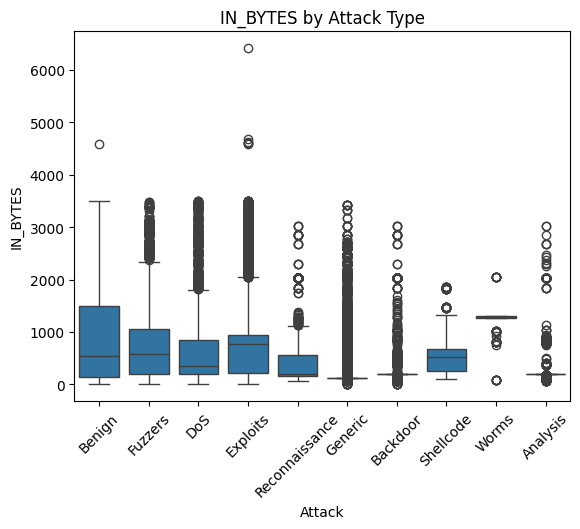

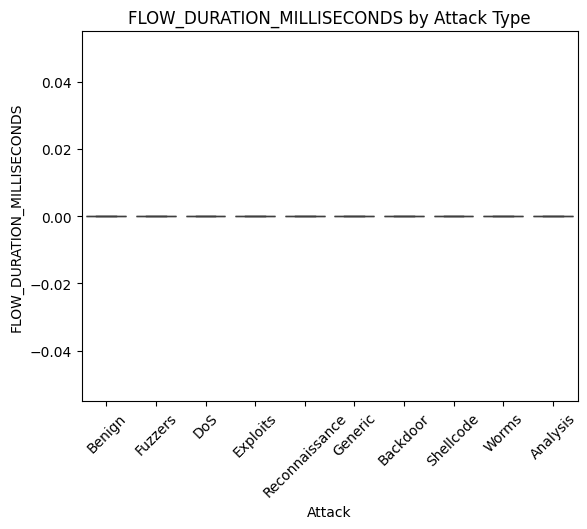

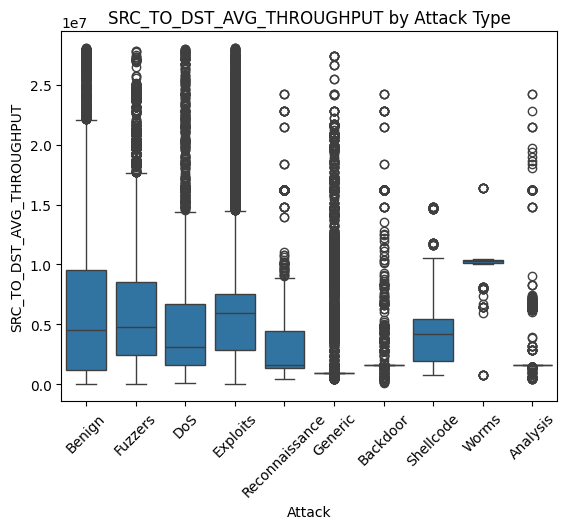

In [ ]:
for col in ['IN_BYTES', 'FLOW_DURATION_MILLISECONDS', 'SRC_TO_DST_AVG_THROUGHPUT']:
    plt.figure()
    sns.boxplot(x='Attack', y=col, data=df)
    plt.title(f'{col} by Attack Type')
    plt.xticks(rotation=45)
    plt.show()

**9. Protocol and Port Analysis per Category**

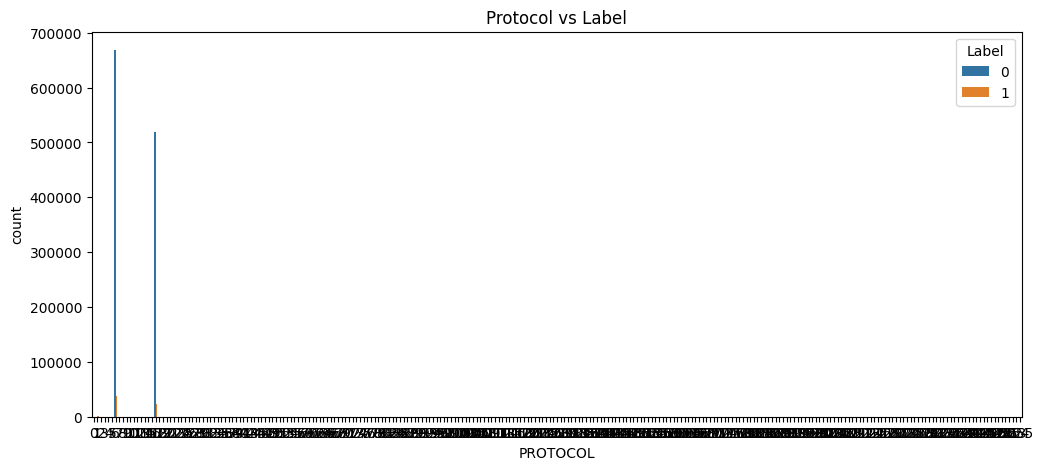

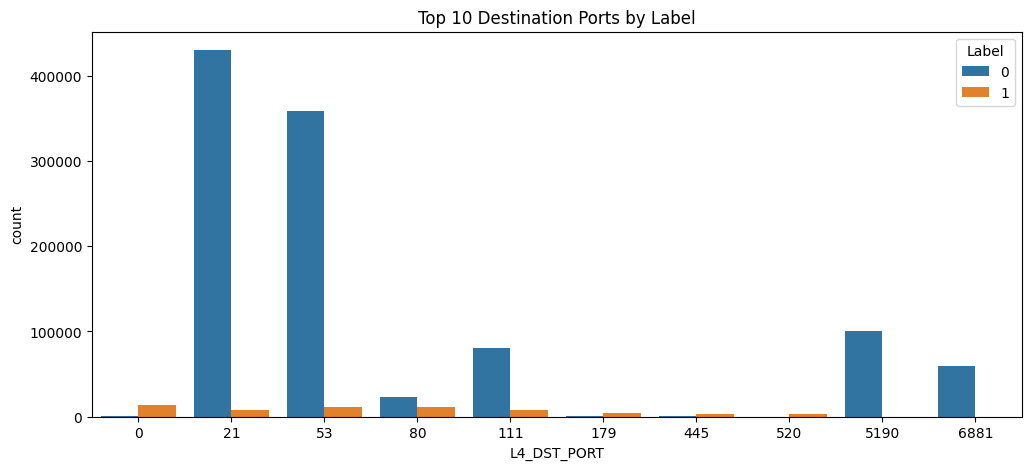

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='PROTOCOL', hue='Label', data=df)
plt.title('Protocol vs Label')
plt.show()

plt.figure(figsize=(12,5))
top_ports = df['L4_DST_PORT'].value_counts().index[:10]
sns.countplot(x='L4_DST_PORT', hue='Label', data=df[df['L4_DST_PORT'].isin(top_ports)])
plt.title('Top 10 Destination Ports by Label')
plt.show()

**10. Feature Correlation Analysis**

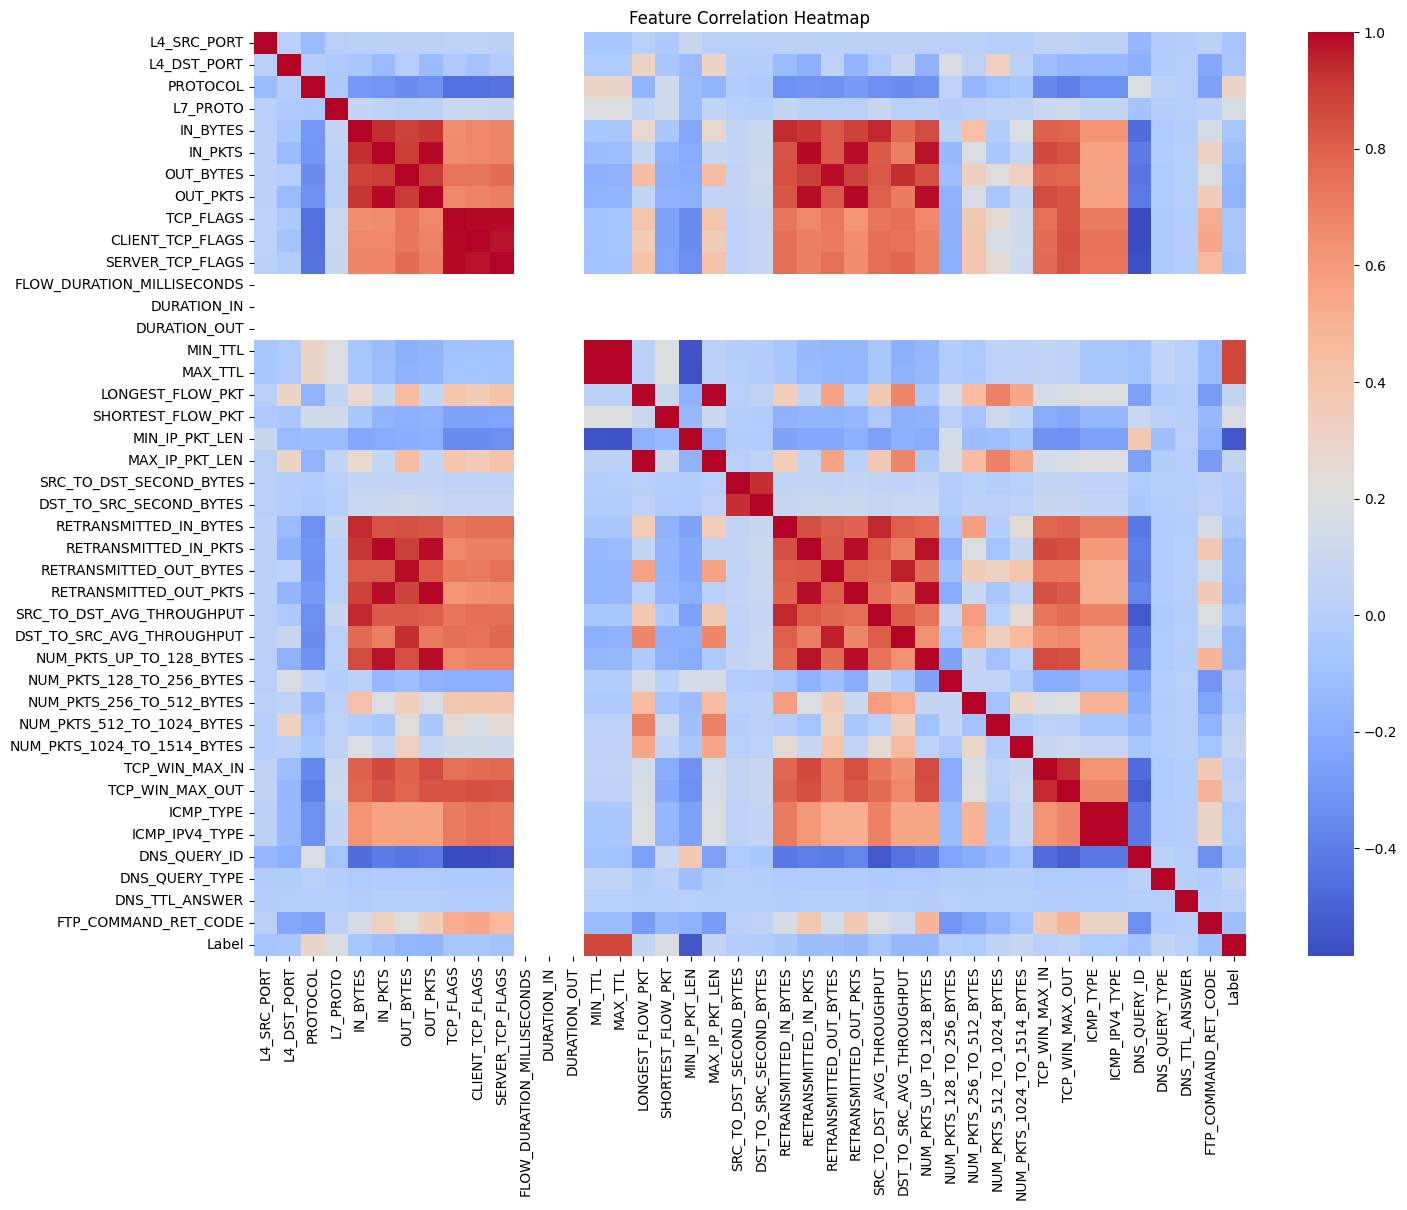

In [ ]:
corrmat = df.select_dtypes(include='number').corr()
plt.figure(figsize=(16,12))
sns.heatmap(corrmat, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()